In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import classification as cl

In [2]:
data=pd.read_csv("classification_train_miniature.csv")
data.head()

,Unnamed: 0,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9
0,0,8,0,0,0,0,0,0,0,0,0
1,1,4,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,130
3,3,8,0,0,0,0,0,0,0,0,0
4,4,2,0,0,0,0,1,0,3,0,0


In [3]:
l=list()
for c in range(1,10):
    l.append(data[f"pixel{c}"][0:31])
xtemp=np.array(l)
x_train=np.transpose(xtemp)
y_train=np.array(data['label'][0:31])

In [4]:
print("Column\tRange\n")
for i in range(len(xtemp)):
    print(f"pixel{i+1} \t{min(xtemp[i])}---{max(xtemp[i])}\n")
print("_____________________________________________________________")
print(f"label\t{min(y_train)}---{max(y_train)}\n")

Column	Range

pixel1 	0---0

pixel2 	0---0

pixel3 	0---1

pixel4 	0---3

pixel5 	0---2

pixel6 	0---2

pixel7 	0---4

pixel8 	0---42

pixel9 	0---130

_____________________________________________________________
label	0---9



In [5]:
for i in range(len(xtemp)):
    if max(xtemp[i])>1:
        xtemp[i]=cl.scale_down(xtemp[i])
x_train=np.transpose(xtemp)

In [6]:
print("Column\tRange\n")
for i in range(len(xtemp)):
    print(f"pixel{i+1} \t{min(xtemp[i])}---{max(xtemp[i])}\n")
print("_____________________________________________________________")
print(f"label\t{min(y_train)}---{max(y_train)}\n")

Column	Range

pixel1 	0---0

pixel2 	0---0

pixel3 	0---1

pixel4 	0---1

pixel5 	0---1

pixel6 	0---1

pixel7 	0---1

pixel8 	0---1

pixel9 	0---1

_____________________________________________________________
label	0---9



In [7]:
xt=np.array(x_train)

In [8]:
xtemp=np.transpose(xt)
for i in range(len(xtemp)):
    if max(xtemp[i])>1:
        xtemp[i]=cl.scale_down(xtemp[i])
xt=np.transpose(xtemp)

[[-0.55555556 -0.55555556 -2.55555556 ...  0.44444444 -1.55555556
   2.44444444]
 [-0.53550086 -0.53550086 -2.46780161 ...  0.42780615 -1.50294757
   2.35993104]
 [-0.51696824 -0.51696824 -2.38199923 ...  0.4108895  -1.45238476
   2.2793879 ]
 ...
 [-0.00304788 -0.00304788 -0.00623025 ... -0.00665386 -0.00634054
  -0.00734042]
 [-0.00304808 -0.00304808 -0.00622679 ... -0.00664999 -0.00633696
  -0.00733587]
 [-0.00304828 -0.00304828 -0.00622333 ... -0.00664612 -0.0063334
  -0.00733133]]


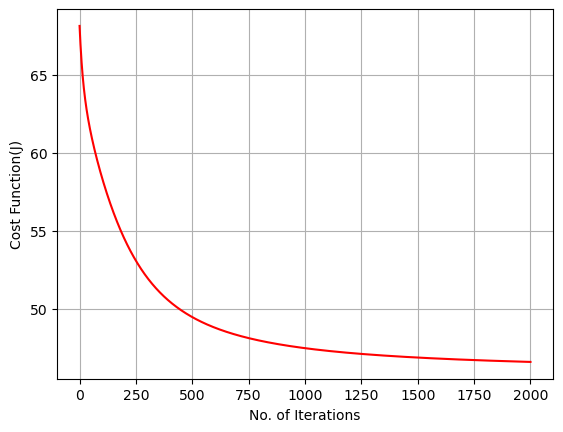

In [14]:
cl.check_alpha_softmax(xt,y_train,0.01,2000)

In [15]:
theta=cl.linear_softmax(xt,y_train,0.01,2000)

------------------------------
J-----> 68.11396189742283
count--> 0 

------------------------------
------------------------------
J-----> 61.238864523952564
count--> 50 

------------------------------
------------------------------
J-----> 58.36713983423969
count--> 100 

------------------------------
------------------------------
J-----> 56.17579971261103
count--> 150 

------------------------------
------------------------------
J-----> 54.43791843248703
count--> 200 

------------------------------
------------------------------
J-----> 53.06578472546282
count--> 250 

------------------------------
------------------------------
J-----> 51.98496214499065
count--> 300 

------------------------------
------------------------------
J-----> 51.13047030956131
count--> 350 

------------------------------
------------------------------
J-----> 50.44941010058206
count--> 400 

------------------------------
------------------------------
J-----> 49.900807498430915
count--> 450 

--

In [16]:
domain=cl.Domain(y_train)
y_pre=cl.predict_softmax(xt,theta,domain)

In [17]:
err=(y_pre-y_train)**2
error=(np.sum(err)/err.shape[0])**(1/2)
print(error)

3.3408517360967465


In [19]:
print(y_pre-y_train)

[-6. -2.  0. -6.  0.  2. -5. -2.  0. -5. -7.  0.  1. -5.  0.  0.  0.  0.
 -2. -6. -2. -6.  2.  0.  0.  0. -6. -4.  0.  1.  0.]
